In [8]:
import os
import astropy
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt
import h5py

Black Holes

In [31]:
path = []
for dirname, _, filenames in os.walk('C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/Data/Black Holes/SagA'):
    for filename in filenames:
        path.append(os.path.join(dirname, filename))

In [32]:
path

['C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/Data/Black Holes/SagA\\30001002001\\event_cl\\nu30001002001A01_cl.evt.gz',
 'C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/Data/Black Holes/SagA\\30001002001\\event_cl\\nu30001002001B01_cl.evt.gz',
 'C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/Data/Black Holes/SagA\\30001002002\\event_cl\\nu30001002002A01_cl.evt.gz',
 'C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/Data/Black Holes/SagA\\30001002002\\event_cl\\nu30001002002B01_cl.evt.gz',
 'C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/Data/Black Holes/SagA\\30001002003\\event_cl\\nu30001002003A01_cl.evt.gz',
 'C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/Data/Black Holes/SagA\\30001002003\\event_cl\\nu30001002003B01_cl.evt.gz',
 'C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/Data/Black Holes/SagA\\30001002004\\event_cl\\nu30001002004A01_cl.evt.gz',
 'C:/U

In [33]:
#Building the dataset
with h5py.File('SagA_obs.h5', 'w') as hf:
    # Process multiple files
    obs_files = path
    for i, filename in enumerate(obs_files):
        with fits.open(filename) as hdul:
            events = hdul[1].data
            photon_data = np.column_stack([
                events['X'], events['Y'], 
                events['TIME'], events['PI']
            ])
            
            hf.create_dataset(f'observation_{i}', data=photon_data)
            hf[f'observation_{i}'].attrs['filename'] = filename
            hf.attrs['object_type'] = 'Black Hole'
            hf.attrs['source_name'] = 'SagA'

In [25]:
#Making sure it worked
with h5py.File('SagA_obs.h5', 'r') as hf:
    print(f"Object: {hf.attrs['object_type']}")
    print(f"Source: {hf.attrs['source_name']}")
    print(f"\nTotal observations: {len(hf.keys())}\n")
    
    for obs_name in list(hf.keys())[:5]:  # First 5
        data = hf[obs_name]
        print(f"{obs_name}:")
        print(f"  Shape: {data.shape}")
        print(f"  File: {data.attrs['filename']}")
        print(f"  Photons: {len(data)}")
        print()

Object: Black Hole
Source: SagA

Total observations: 152

observation_0:
  Shape: (589654, 4)
  File: C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/Data/SagA\30001002001\event_cl\nu30001002001A01_cl.evt.gz
  Photons: 589654

observation_1:
  Shape: (1052451, 4)
  File: C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/Data/SagA\30001002001\event_cl\nu30001002001B01_cl.evt.gz
  Photons: 1052451

observation_10:
  Shape: (287889, 4)
  File: C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/Data/SagA\30001002008\event_cl\nu30001002008A01_cl.evt.gz
  Photons: 287889

observation_100:
  Shape: (2036, 4)
  File: C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/Data/SagA\30801024005\event_cl\nu30801024005A01_cl.evt.gz
  Photons: 2036

observation_101:
  Shape: (1560, 4)
  File: C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/Data/SagA\30801024005\event_cl\nu30801024005B01_cl.evt.gz
  Photons: 1560



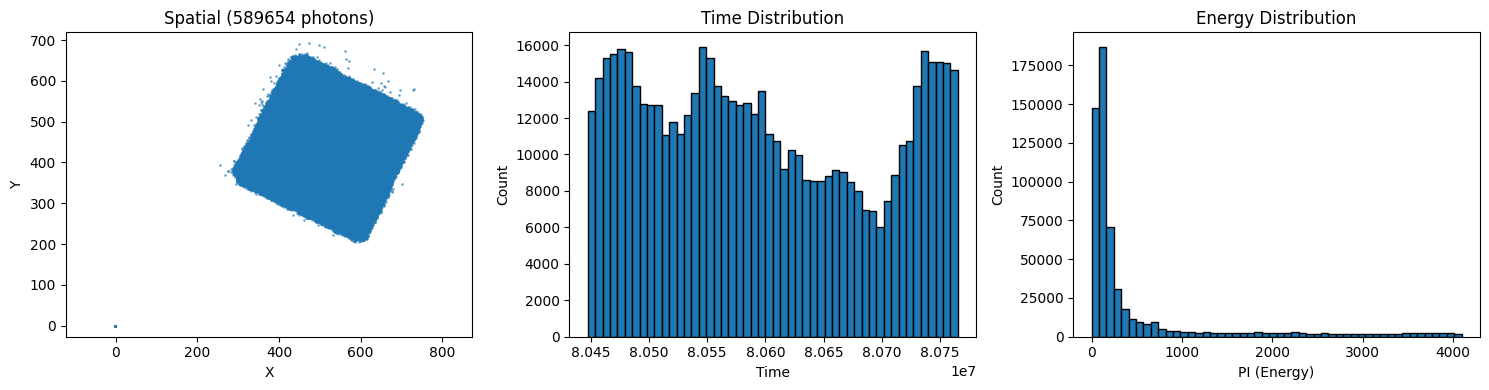

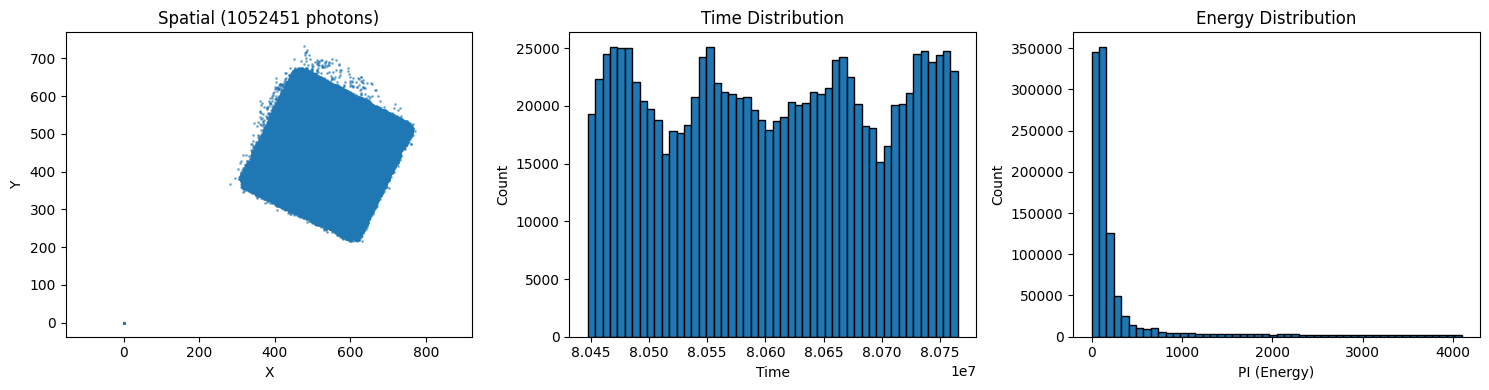

In [ ]:
def view_observation(filename, obs_index):
    """Quick viewer for a specific observation"""
    with h5py.File(filename, 'r') as hf:
        data = hf[f'observation_{obs_index}'][:]
        
        fig, axes = plt.subplots(1, 3, figsize=(15, 4))
        
        # Spatial distribution
        axes[0].scatter(data[:, 0], data[:, 1], s=1, alpha=0.5)
        axes[0].set_xlabel('X')
        axes[0].set_ylabel('Y')
        axes[0].set_title(f'Spatial ({len(data)} photons)')
        axes[0].axis('equal')
        
        # Time distribution
        axes[1].hist(data[:, 2], bins=50, edgecolor='black')
        axes[1].set_xlabel('Time')
        axes[1].set_ylabel('Count')
        axes[1].set_title('Time Distribution')
        
        # Energy (PI) distribution
        axes[2].hist(data[:, 3], bins=50, edgecolor='black')
        axes[2].set_xlabel('PI (Energy)')
        axes[2].set_ylabel('Count')
        axes[2].set_title('Energy Distribution')
        
        plt.tight_layout()
        plt.show()

view_observation('SagA_obs.h5', 0)
view_observation('SagA_obs.h5', 1)

In [34]:
m87path = []
for dirname, _, filenames in os.walk('C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/Data/Black Holes/M87'):
    for filename in filenames:
        m87path.append(os.path.join(dirname, filename))

cenapath = []
for dirname, _, filenames in os.walk('C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/Data/Black Holes/CenA'):
    for filename in filenames:
        cenapath.append(os.path.join(dirname, filename))

ngcpath = []
for dirname, _, filenames in os.walk('C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/Data/Black Holes/NGC1275'):
    for filename in filenames:
        ngcpath.append(os.path.join(dirname, filename))

In [52]:
#Building the dataset
with h5py.File('M87_obs.h5', 'w') as hf:
    # Process multiple files
    obs_files = m87path
    for i, filename in enumerate(obs_files):
        with fits.open(filename) as hdul:
            events = hdul[1].data
            photon_data = np.column_stack([
                events['X'], events['Y'], 
                events['TIME'], events['PI']
            ])
            
            hf.create_dataset(f'observation_{i}', data=photon_data)
            hf[f'observation_{i}'].attrs['filename'] = filename
            hf.attrs['object_type'] = 'Black Hole'
            hf.attrs['source_name'] = 'M87'

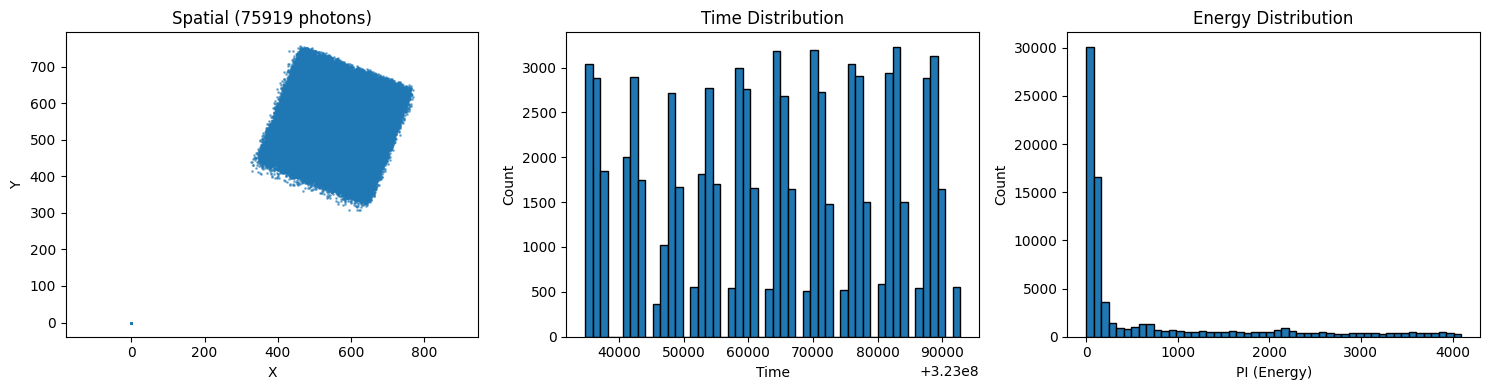

In [54]:
view_observation('M87_obs.h5', 0)

In [36]:
#Building the dataset
with h5py.File('CenA_obs.h5', 'w') as hf:
    # Process multiple files
    obs_files = cenapath
    for i, filename in enumerate(obs_files):
        with fits.open(filename) as hdul:
            events = hdul[1].data
            photon_data = np.column_stack([
                events['X'], events['Y'], 
                events['TIME'], events['PI']
            ])
            
            hf.create_dataset(f'observation_{i}', data=photon_data)
            hf[f'observation_{i}'].attrs['filename'] = filename
            hf.attrs['object_type'] = 'Black Hole'
            hf.attrs['source_name'] = 'CenA'

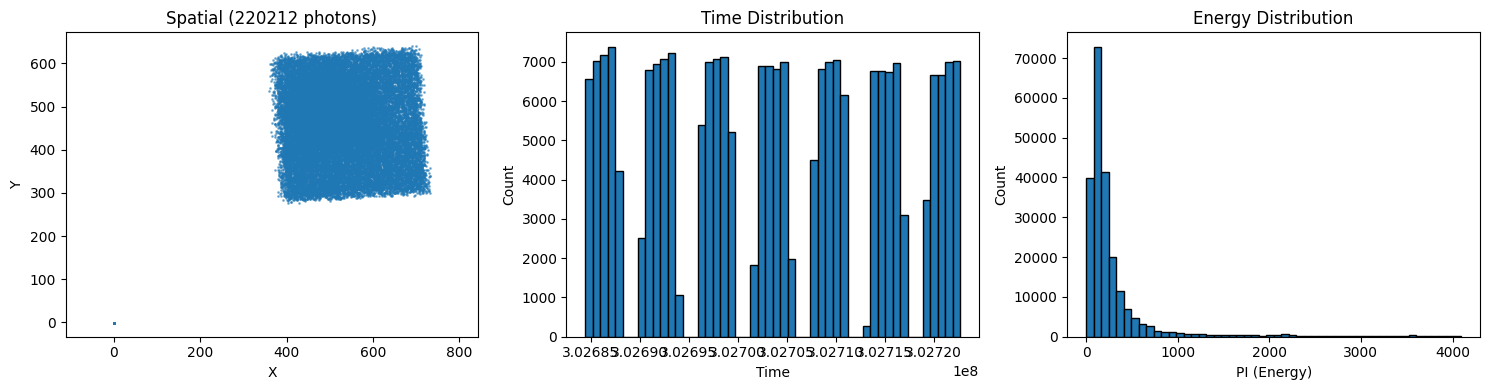

In [55]:
view_observation('CenA_obs.h5', 0)

In [38]:
#Building the dataset
with h5py.File('NGC1275_obs.h5', 'w') as hf:
    # Process multiple files
    obs_files = ngcpath
    for i, filename in enumerate(obs_files):
        with fits.open(filename) as hdul:
            events = hdul[1].data
            photon_data = np.column_stack([
                events['X'], events['Y'], 
                events['TIME'], events['PI']
            ])
            
            hf.create_dataset(f'observation_{i}', data=photon_data)
            hf[f'observation_{i}'].attrs['filename'] = filename
            hf.attrs['object_type'] = 'Black Hole'
            hf.attrs['source_name'] = 'NGC 1275'

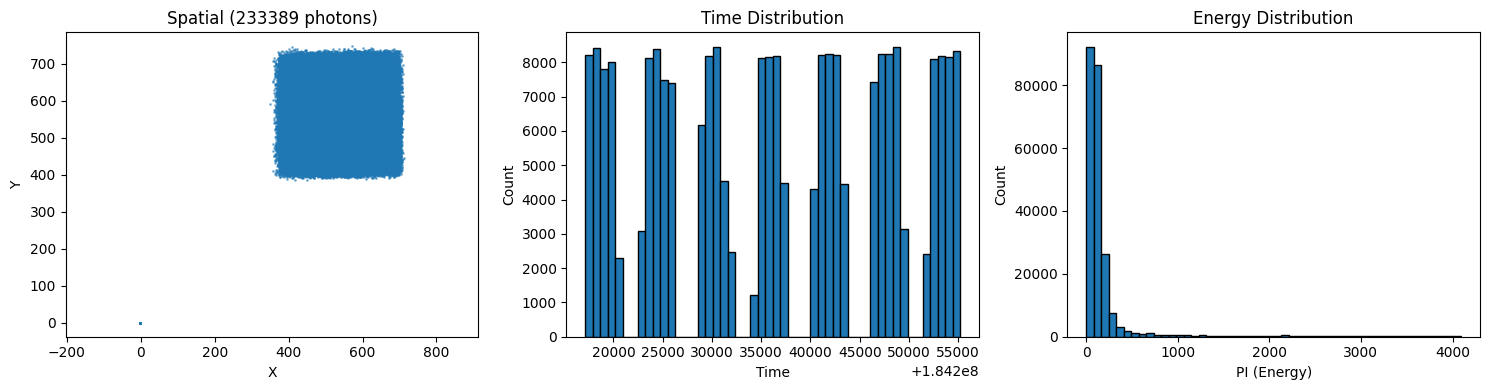

In [56]:
view_observation('NGC1275_obs.h5', 0)

Pulsars

In [ ]:
m82path = []
for dirname, _, filenames in os.walk('C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/Data/Black Holes/M82'):
    for filename in filenames:
        m82path.append(os.path.join(dirname, filename))

ngculxpath = []
for dirname, _, filenames in os.walk('C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/Data/Black Holes/NGC 5907 ULX'):
    for filename in filenames:
        ngculxpath.append(os.path.join(dirname, filename))

psrpath = []
for dirname, _, filenames in os.walk('C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/Data/Black Holes/PSR B0833m45'):
    for filename in filenames:
        psrpath.append(os.path.join(dirname, filename))

terzpath = []
for dirname, _, filenames in os.walk('C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/Data/Black Holes/Terzan 5'):
    for filename in filenames:
        terzpath.append(os.path.join(dirname, filename))

In [40]:
#Building the dataset
with h5py.File('M82_obs.h5', 'w') as hf:
    # Process multiple files
    obs_files = m82path
    for i, filename in enumerate(obs_files):
        with fits.open(filename) as hdul:
            events = hdul[1].data
            photon_data = np.column_stack([
                events['X'], events['Y'], 
                events['TIME'], events['PI']
            ])
            
            hf.create_dataset(f'observation_{i}', data=photon_data)
            hf[f'observation_{i}'].attrs['filename'] = filename
            hf.attrs['object_type'] = 'Pulsar'
            hf.attrs['source_name'] = 'M82'

In [57]:
view_observation('M82_obs.h5', 0)

KeyError: "Unable to synchronously open object (object 'observation_0' doesn't exist)"

In [41]:
#Building the dataset
with h5py.File('NGC_5907_ULX_obs.h5', 'w') as hf:
    # Process multiple files
    obs_files = ngculxpath
    for i, filename in enumerate(obs_files):
        with fits.open(filename) as hdul:
            events = hdul[1].data
            photon_data = np.column_stack([
                events['X'], events['Y'], 
                events['TIME'], events['PI']
            ])
            
            hf.create_dataset(f'observation_{i}', data=photon_data)
            hf[f'observation_{i}'].attrs['filename'] = filename
            hf.attrs['object_type'] = 'Pulsar'
            hf.attrs['source_name'] = 'NGC 5907 ULX'

In [42]:
with h5py.File('PSR_B0833m45_obs.h5', 'w') as hf:
    # Process multiple files
    obs_files = psrpath
    for i, filename in enumerate(obs_files):
        with fits.open(filename) as hdul:
            events = hdul[1].data
            photon_data = np.column_stack([
                events['X'], events['Y'], 
                events['TIME'], events['PI']
            ])
            
            hf.create_dataset(f'observation_{i}', data=photon_data)
            hf[f'observation_{i}'].attrs['filename'] = filename
            hf.attrs['object_type'] = 'Pulsar'
            hf.attrs['source_name'] = 'PSR B0833m45'

In [43]:
with h5py.File('Terzan_5_obs.h5', 'w') as hf:
    # Process multiple files
    obs_files = terzpath
    for i, filename in enumerate(obs_files):
        with fits.open(filename) as hdul:
            events = hdul[1].data
            photon_data = np.column_stack([
                events['X'], events['Y'], 
                events['TIME'], events['PI']
            ])
            
            hf.create_dataset(f'observation_{i}', data=photon_data)
            hf[f'observation_{i}'].attrs['filename'] = filename
            hf.attrs['object_type'] = 'Pulsar'
            hf.attrs['source_name'] = 'Terzan 5'

Merging

In [50]:
datasets = []
for dirname, _, filenames in os.walk('C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/NOVA/Data'):
    for filename in filenames:
        datasets.append(os.path.join(dirname, filename))
datasets

['C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/NOVA/Data\\CenA_obs.h5',
 'C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/NOVA/Data\\M82_obs.h5',
 'C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/NOVA/Data\\M87_obs.h5',
 'C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/NOVA/Data\\NGC1275_obs.h5',
 'C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/NOVA/Data\\NGC_5907_ULX_obs.h5',
 'C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/NOVA/Data\\PSR_B0833m45_obs.h5',
 'C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/NOVA/Data\\SagA_obs.h5',
 'C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/NOVA/Data\\Terzan_5_obs.h5']

In [51]:
import h5py

source_files = datasets

with h5py.File('combined_dataset.h5', 'w') as hf_out:
    obs_counter = 0
    
    for source_file in source_files:
        print(f"Processing {source_file}...")
        
        with h5py.File(source_file, 'r') as hf_in:
            # Get source metadata
            object_type = hf_in.attrs.get('object_type', 'Unknown')
            source_name = hf_in.attrs.get('source_name', 'Unknown')
            
            # Count observations before processing
            num_obs = len(hf_in.keys())
            
            # Copy each observation
            for obs_name in hf_in.keys():
                data = hf_in[obs_name][:]
                filename = hf_in[obs_name].attrs.get('filename', '')
                
                # Create new observation with unique name
                new_name = f'observation_{obs_counter}'
                ds = hf_out.create_dataset(new_name, data=data)
                
                # Store all metadata as attributes
                ds.attrs['filename'] = filename
                ds.attrs['object_type'] = object_type
                ds.attrs['source_name'] = source_name
                ds.attrs['original_file'] = source_file
                
                obs_counter += 1
            
            # Print inside the with block
            print(f"  Added {num_obs} observations")
                
    print(f"\nTotal: {obs_counter} observations combined")

Processing C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/NOVA/Data\CenA_obs.h5...
  Added 12 observations
Processing C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/NOVA/Data\M82_obs.h5...
  Added 0 observations
Processing C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/NOVA/Data\M87_obs.h5...
  Added 38 observations
Processing C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/NOVA/Data\NGC1275_obs.h5...
  Added 4 observations
Processing C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/NOVA/Data\NGC_5907_ULX_obs.h5...
  Added 0 observations
Processing C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/NOVA/Data\PSR_B0833m45_obs.h5...
  Added 0 observations
Processing C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/NOVA/Data\SagA_obs.h5...
  Added 152 observations
Processing C:/Users/foolf/Desktop/School/Fall 2025/Machine Learning/Project/NOVA/Data\Terzan_5_obs.h5...
  Adde

In [ ]:
M82